In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime

http://greenteapress.com/wp/think-bayes/

Roger Labbe has transformed _Think Bayes_ into IPython notebooks where you can modify and run the code

There are several excellent modules for doing Bayesian statistics in Python, including pymc and OpenBUGS. I chose not to use them for this book because you need a fair amount of background knowledge to get started with these modules, and I want to keep the prerequisites minimal. If you know Python and a little bit about probability, you are ready to start this book.

## Chapter 1 Bayes's Theorem

### Conditional probability

The usual notation for conditional probability is p(A|B), which is the probability of A given that B is true.

### Conjoint probability

In general, the probability of a conjunction is

p(A  and  B) = p(A) p(B|A) 

### The cookie problem

We’ll get to Bayes’s theorem soon, but I want to motivate it with an example called the cookie problem.1 Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each.
Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

This is a conditional probability; we want p(Bowl 1 | vanilla), but it is not obvious how to compute it. If I asked a different question—the probability of a vanilla cookie given Bowl 1—it would be easy:

p(vanilla | Bowl 1) = 3/4 
Sadly, p(A|B) is not the same as p(B|A), but there is a way to get from one to the other: Bayes’s theorem.

### Bayes's theorem

$
p(A|B) = \frac{ p(A) p(B|A)}{p(B)}
$ 

And that’s Bayes’s theorem! It might not look like much, but it turns out to be surprisingly powerful.

$
p(B_1|V) = \frac{(1/2) (3/4)}{ (1/2)(3/4) + (1/2)(1/2)} = 3/5
$

So the vanilla cookie is evidence in favor of the hypothesis that we chose Bowl 1, because vanilla cookies are more likely to come from Bowl 1.

This example demonstrates one use of Bayes’s theorem: it provides a strategy to get from p(B|A) to p(A|B). This strategy is useful in cases, like the cookie problem, where it is easier to compute the terms on the right side of Bayes’s theorem than the term on the left.

### The diachronic interpretation

There is another way to think of Bayes’s theorem: it gives us a way to update the probability of a hypothesis, H, in light of some body of data, D.
This way of thinking about Bayes’s theorem is called the diachronic interpretation. “Diachronic” means that something is happening over time; in this case the probability of the hypotheses changes, over time, as we see new data.

Rewriting Bayes’s theorem with H and D yields:

$
p(H|D) = \frac{p(H)p(D|H)}{p(D)}
$

In this interpretation, each term has a name:

* p(H) is the probability of the hypothesis before we see the data, called the prior probability, or just **prior**.
* p(H|D) is what we want to compute, the probability of the hypothesis after we see the data, called the **posterior**.
* p(D|H) is the probability of the data under the hypothesis, called the **likelihood**.
* p(D) is the probability of the data under any hypothesis, called the **normalizing constant**.

Sometimes we can compute the prior based on background information. For example, the cookie problem specifies that we choose a bowl at random with equal probability.
In other cases the prior is subjective; that is, reasonable people might disagree, either because they use different background information or because they interpret the same information differently.

The likelihood is usually the easiest part to compute. In the cookie problem, if we know which bowl the cookie came from, we find the probability of a vanilla cookie by counting.

The normalizing constant can be tricky. It is supposed to be the probability of seeing the data under any hypothesis at all, but in the most general case it is hard to nail down what that means.

Most often we simplify things by specifying a set of hypotheses that are

**Mutually exclusive**:
At most one hypothesis in the set can be true, and
**Collectively exhaustive**:
There are no other possibilities; at least one of the hypotheses has to be true.
I use the word suite for a set of hypotheses that has these properties.


In the cookie problem, there are only two hypotheses—the cookie came from Bowl 1 or Bowl 2—and they are mutually exclusive and collectively exhaustive.

In that case we can compute p(D) using the law of total probability, which says that if there are two exclusive ways that something might happen, you can add up the probabilities like this:

$
p(D) = p(B1) p(D|B1) + p(B2) p(D|B2) 
$


Plugging in the values from the cookie problem, we have


$
p(D) = (1/2) (3/4) + (1/2) (1/2) = 5/8 
$

### The M&M problem

M&M’s are small candy-coated chocolates that come in a variety of colors. Mars, Inc., which makes M&M’s, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M’s. Before then, the color mix in a bag of plain M&M’s was 30% Brown, 20% Yellow, 20% Red, 10% Green, 10% Orange, 10% Tan. Afterward it was 24% Blue , 20% Green, 16% Orange, 14% Yellow, 13% Red, 13% Brown.

Suppose a friend of mine has two bags of M&M’s, and he tells me that one is from 1994 and one from 1996. He won’t tell me which is which, but he gives me one M&M from each bag. One is yellow and one is green. What is the probability that the yellow one came from the 1994 bag?

This problem is similar to the cookie problem, with the twist that I draw one sample from each bowl/bag. This problem also gives me a chance to demonstrate the table method, which is useful for solving problems like this on paper. In the next chapter we will solve them computationally.

The first step is to enumerate the hypotheses. The bag the yellow M&M came from I’ll call Bag 1; I’ll call the other Bag 2. So the hypotheses are:

* A: Bag 1 is from 1994, which implies that Bag 2 is from 1996.
* B: Bag 1 is from 1996 and Bag 2 is from 1994.

Now we construct a table with a row for each hypothesis and a column for each term in Bayes's theorem:
 
| | p(H) | p(D &#124; H)  | p(H)p(D &#124; H) | p(H &#124; D) | 
|:-----:|:--------------:|:-----------------:|:-------------:|:---------------------:|
|A| 1/2 | (20)(20) | 200 |  20/27     |
|B| 1/2 | (14)(10)  | 70   |   7/27 |   

The second column has the likelihoods, which follow from the information in the problem. For example, if A is true, the yellow M&M came from the 1994 bag with probability 20%, and the green came from the 1996 bag with probability 20%. If B is true, the yellow M&M came from the 1996 bag with probability 14%, and the green came from the 1994 bag with probability 10%. Because the selections are independent, we get the conjoint probability by multiplying.


The third column is just the product of the previous two. The sum of this column, 270, is the normalizing constant. To get the last column, which contains the posteriors, we divide the third column by the normalizing constant.

That’s it. Simple, right?


Well, you might be bothered by one detail. I write p(D|H) in terms of percentages, not probabilities, which means it is off by a factor of 10,000. But that cancels out when we divide through by the normalizing constant, so it doesn’t affect the result.

When the set of hypotheses is mutually exclusive and collectively exhaustive, you can multiply the likelihoods by any factor, if it is convenient, as long as you apply the same factor to the entire column.

### The Monty Hall problem

The Monty Hall problem might be the most contentious question in the history of probability. The scenario is simple, but the correct answer is so counterintuitive that many people just can’t accept it, and many smart people have embarrassed themselves not just by getting it wrong but by arguing the wrong side, aggressively, in public.

Monty Hall was the original host of the game show Let’s Make a Deal. The Monty Hall problem is based on one of the regular games on the show. If you are on the show, here’s what happens:

* Monty shows you three closed doors and tells you that there is a prize behind each door: one prize is a car, the other two are less valuable prizes like peanut butter and fake finger nails. The prizes are arranged at random.
* The object of the game is to guess which door has the car. If you guess right, you get to keep the car.
* You pick a door, which we will call Door A. We’ll call the other doors B and C.
* Before opening the door you chose, Monty increases the suspense by opening either Door B or C, whichever does not have the car. (If the car is actually behind Door A, Monty can safely open B or C, so he chooses one at random.)
* Then Monty offers you the option to stick with your original choice or switch to the one remaining unopened door.

The question is, should you “stick” or “switch” or does it make no difference?
Most people have the strong intuition that it makes no difference. There are two doors left, they reason, so the chance that the car is behind Door A is 50%.

But that is wrong. In fact, the chance of winning if you stick with Door A is only 1/3; if you switch, your chances are 2/3.

By applying Bayes’s theorem, we can break this problem into simple pieces, and maybe convince ourselves that the correct answer is, in fact, correct.

To start, we should make a careful statement of the data. In this case D consists of two parts: Monty chooses Door B and there is no car there.

Next we define three hypotheses: A, B, and C represent the hypothesis that the car is behind Door A, Door B, or Door C. Again, let’s apply the table method:


| | Prior | Likelihood | | Posterior |
|:------------:|:-------------------:|:------------------:|:--------------:|:-----------------------:|
| | p(H) | p(D &#124; H) | p(H) p(D &#124; H) | p(H &#124; D) |
|A| 1/3 | 1/2 | 1/6 | 1/3 | 
|B| 1/3 | 0 | 0 | 0 |
|C| 1/3 | 1 | 1/3 | 2/3 | 


In [2]:
df = pd.read_csv('PathwayComplianceCustomSearch.csv',skiprows=[0])

In [3]:
df.head()

,Diagnosis Date,Patient Name,MRN,Cancer Type,Event Type,Event,Event Value,Provider,Compliance
0,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Diagnosis Date,2014/03/24 00:00:00.000,Fontaine Annette,YES
1,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Stage,Stage IIB,Fontaine Annette,YES
2,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Staging Date,2014/04/22 00:00:00.000,Fontaine Annette,YES
3,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Staging Components,M0|pN1a|T2,Fontaine Annette,YES
4,3/24/14 12:00 AM,"Taylor, Elizabeth",71587,Breast,StructuredData,Performance Status,1,Fontaine Annette,YES


In [4]:
dfsmall = df[['Patient Name','MRN','Cancer Type']].copy()

In [5]:
dfsmall.shape

(5445, 3)

In [6]:
dfsmall.columns

Index([u'Patient Name', u'MRN', u'Cancer Type'], dtype='object')

In [7]:
dftiny = dfsmall[dfsmall['Patient Name'] != 'Patient Name'].drop_duplicates()

In [8]:
dftiny.shape

(422, 3)

In [9]:
dftiny.head()

,Patient Name,MRN,Cancer Type
0,"Taylor, Elizabeth",71587,Breast
11,"Bumgarner Kirby, Hue",25684,Breast
20,"Pena, Louise",75975,Breast
29,"Yazzie, Alfreda",76122,Breast
41,"Kahle, Christine",76141,Breast


In [10]:
dftiny

,Patient Name,MRN,Cancer Type
0,"Taylor, Elizabeth",71587,Breast
11,"Bumgarner Kirby, Hue",25684,Breast
20,"Pena, Louise",75975,Breast
29,"Yazzie, Alfreda",76122,Breast
41,"Kahle, Christine",76141,Breast
50,"Davis, Sandra",76164,Breast
61,"Bhakta, Sarashvatiben",76239,Breast
66,"Bhakta,",76239,Breast
68,Sarashvatiben,76239,Breast
72,"Adams, Carolyn",76267,Breast


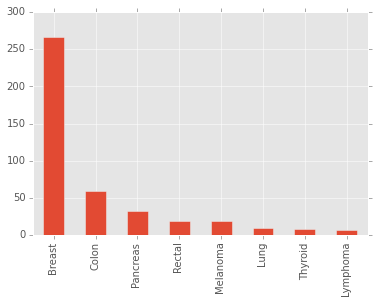

In [11]:
dftiny['Cancer Type'].value_counts().plot(kind='bar')

| | Prior | Likelihood | | Posterior |
|:------------:|:-------------------:|:------------------:|:--------------:|:-----------------------:|
| | p(H) | p(D &#124; H) | p(H) p(D &#124; H) | p(H &#124; D) |
|A| 1/3 | 1/2 | 1/6 | 1/3 | 
|B| 1/3 | 0 | 0 | 0 |
|C| 1/3 | 1 | 1/3 | 2/3 | 


There are many variations of the Monty Hall problem. One of the strengths of the Bayesian approach is that it generalizes to handle these variations.




## Chapter 2 Computational Statistics

### Distributions



In [12]:
from thinkbayes import Pmf

In [13]:
pmf = Pmf()
for x in [1,2,3,4,5,6]:
    pmf.Set(x, 1/6.0)

In [14]:
help(pmf)

Help on Pmf in module thinkbayes object:

class Pmf(_DictWrapper)
 |  Represents a probability mass function.
 |  
 |  Values can be any hashable type; probabilities are floating-point.
 |  Pmfs are not necessarily normalized.
 |  
 |  Method resolution order:
 |      Pmf
 |      _DictWrapper
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  AddConstant(self, other)
 |      Computes the Pmf of the sum a constant and  values from self.
 |      
 |      other: a number
 |      
 |      returns: new Pmf
 |  
 |  AddPmf(self, other)
 |      Computes the Pmf of the sum of values drawn from self and other.
 |      
 |      other: another Pmf
 |      
 |      returns: new Pmf
 |  
 |  CredibleInterval(self, percentage=90)
 |      Computes the central credible interval.
 |      
 |      If percentage=90, computes the 90% CI.
 |      
 |      Args:
 |          percentage: float between 0 and 100
 |      
 |      Returns:
 |          sequence of two floats, low and high
 |  
 | 

### The cookie problem

In the context of Bayes’s theorem, it is natural to use a Pmf to map from each hypothesis to its probability. In the cookie problem, the hypotheses are B1 and B2. In Python, I represent them with strings:

In [15]:
pmf = Pmf()
pmf.Set('Bowl 1', 0.5)
pmf.Set('Bowl 2', 0.5)

To update the distribution based on new data (the vanilla cookie), we multiply each prior by the corresponding likelihood. The likelihood of drawing a vanilla cookie from Bowl 1 is 3/4. The likelihood for Bowl 2 is 1/2.

In [16]:
pmf.Mult('Bowl 1', 0.75)
pmf.Mult('Bowl 2', 0.5)

In [17]:
pmf.Normalize()

0.625

In [18]:
print pmf.Prob('Bowl 1')

0.6


In [19]:
print pmf.Prob('Bowl 2')

0.4


### The Bayesian framework



In [20]:
class Cookie(Pmf):

    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()   
        
    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }

    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
    

In [21]:
hypos = ['Bowl 1', 'Bowl 2']
pmf = Cookie(hypos)

In [22]:
pmf.Update('vanilla')

In [23]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.4
Bowl 1 0.6


In [24]:
dataset = ['vanilla', 'chocolate', 'vanilla']
for data in dataset:
    pmf.Update(data)

In [25]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.372093023256
Bowl 1 0.627906976744


In [26]:
class Monty(Pmf):

    def __init__(self, hypos):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        
    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1
        
        
        
    

In [27]:
hypos = 'ABC'
pmf = Monty(hypos)

In [28]:
data = 'B'
pmf.Update(data)

In [29]:
for hypo, prob in pmf.Items():
    print hypo, prob

A 0.333333333333
C 0.666666666667
B 0.0


The implementation of Suite is in thinkbayes.py. To use Suite, you should write a class that inherits from it and provides Likelihood. For example, here is the solution to the Monty Hall problem rewritten to use Suite:

In [30]:
from thinkbayes import Suite

class Monty(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo == data:
            return 0
        elif hypo == 'A':
            return 0.5
        else:
            return 1

In [31]:
suite = Monty('ABC')

In [32]:
suite.Update('B')

0.5

In [33]:
suite.Print()

A 0.333333333333
B 0.0
C 0.666666666667


In [34]:
mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10)

mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13)

hypoA = dict(bag1=mix94, bag2=mix96)
hypoB = dict(bag1=mix96, bag2=mix94)


In [35]:
hypotheses = dict(A=hypoA,B=hypoB)

In [36]:
hypotheses

{'A': {'bag1': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20},
  'bag2': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14}},
 'B': {'bag1': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14},
  'bag2': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20}}}

In [37]:
from thinkbayes import Suite

class M_and_M(Suite):
    
    
    
    def Likelihood(self, data, hypo):
        bag, color = data
        mix = self.hypotheses[hypo][bag]
        like = mix[color]
        return like

    mix94 = dict(brown=30,
                 yellow=20,
                 red=20,
                 green=10,
                 orange=10,
                 tan=10)

    mix96 = dict(blue=24,
                 green=20,
                 orange=16,
                 yellow=14,
                 red=13,
                 brown=13)

    hypoA = dict(bag1=mix94, bag2=mix96)
    hypoB = dict(bag1=mix96, bag2=mix94)
    
    hypotheses = dict(A=hypoA, B=hypoB)
    
    
    

In [38]:
hypotheses

{'A': {'bag1': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20},
  'bag2': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14}},
 'B': {'bag1': {'blue': 24,
   'brown': 13,
   'green': 20,
   'orange': 16,
   'red': 13,
   'yellow': 14},
  'bag2': {'brown': 30,
   'green': 10,
   'orange': 10,
   'red': 20,
   'tan': 10,
   'yellow': 20}}}

In [39]:
suite = M_and_M('AB')

In [40]:
suite.Update(('bag1','yellow'))
suite.Update(('bag2','green'))

15.882352941176471

In [41]:
suite.Print()

A 0.740740740741
B 0.259259259259


In [42]:
suite.__dict__

{'d': {'A': 0.7407407407407407, 'B': 0.2592592592592592},
 'log': False,
 'name': ''}

In [43]:
help(suite)

Help on M_and_M in module __main__ object:

class M_and_M(thinkbayes.Suite)
 |  Method resolution order:
 |      M_and_M
 |      thinkbayes.Suite
 |      thinkbayes.Pmf
 |      thinkbayes._DictWrapper
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  Likelihood(self, data, hypo)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  hypoA = {'bag1': {'brown': 30, 'green': 10, 'orange': 10, 'red': 20, '...
 |  
 |  hypoB = {'bag1': {'blue': 24, 'brown': 13, 'green': 20, 'orange': 16, ...
 |  
 |  hypotheses = {'A': {'bag1': {'brown': 30, 'green': 10, 'orange': 10, '...
 |  
 |  mix94 = {'brown': 30, 'green': 10, 'orange': 10, 'red': 20, 'tan': 10,...
 |  
 |  mix96 = {'blue': 24, 'brown': 13, 'green': 20, 'orange': 16, 'red': 13...
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from thinkbayes.Suite:
 |  
 |  LogLikelihood(self, data, hypo

In [44]:
suite.hypoA

{'bag1': {'brown': 30,
  'green': 10,
  'orange': 10,
  'red': 20,
  'tan': 10,
  'yellow': 20},
 'bag2': {'blue': 24,
  'brown': 13,
  'green': 20,
  'orange': 16,
  'red': 13,
  'yellow': 14}}

### 2.8 Exercises

#### Exercise 1
In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws. 
Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to ```Cookie``` to represent the hypothetical state of the bowls, and modify ```Likelihood``` accordingly. You might want to define a ```Bowl``` object.

In [45]:
from thinkbayes import Suite

class CookieMonster(Suite):
    
    bowl1 = dict(vanilla=30,chocolate=10)
    bowl2 = dict(vanilla=20,chocolate=20)
    
    
    bowl1total = sum(bowl1.values())
    bowl2total = sum(bowl2.values())
    
    
    vb1 = bowl1['vanilla']/bowl1total
    cb1 = bowl1['chocolate']/bowl1total
    
    vb2 = bowl2['vanilla']/bowl2total
    cb2 = bowl2['chocolate']/bowl2total
    
    
    
    mixes = {
        'Bowl 1':dict(vanilla=0.75, chocolate=0.25),
        'Bowl 2':dict(vanilla=0.5, chocolate=0.5),
        }
    
    
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like

In [46]:
bowl1 = dict(vanilla=30.,chocolate=10.)

In [47]:
bowl1['vanilla']/sum(bowl1.values())

0.75

In [48]:
bowl1['chocolate']/bowl1['vanilla']

0.3333333333333333

In [49]:
bowl1

{'chocolate': 10.0, 'vanilla': 30.0}

In [50]:
sum(bowl1.values())

40.0

## Need to review classes, etc.

## Chapter 15 Classes and objects


A user-defined type is also called a **class**.

In [52]:
class Point(object):
    """Represents a point in 2-D space."""
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y

In [53]:
print Point


<class '__main__.Point'>


In [54]:
blank = Point()

In [55]:
print blank

In [56]:
blank.x = 3.0
blank.y = 4.0

In [57]:
print blank.y

4.0


In [58]:
x = blank.x
print x

3.0


In [59]:
print '(%g, %g)' % (blank.x, blank.y)

(3, 4)


In [60]:
import math
distance = math.sqrt(blank.x**2 + blank.y**2)
print distance

5.0


In [61]:
def print_point(p):
    print '(%g, %g)' % (p.x, p.y)

In [62]:
print_point(blank)

(3, 4)


In [63]:
def distance_between_points(p,q):
    """takes two Points p and q and returns the 
    distance between them."""
    dx = p.x - q.x
    dy = p.y - q.y
    distance = math.sqrt(dx**2 + dy**2)
    return distance

In [64]:
class Rectangle(object):
    """Represents a rectangle.
    
    attributes: width, height, corner."""

In [65]:
box = Rectangle()
box.width = 100.0
box.height = 200.0
box.corner = Point()
box.corner.x = 0.0
box.corner.y = 0.0

In [66]:
def find_center(rect):
    p = Point()
    p.x = rect.corner.x + rect.width/2.0
    p.y = rect.corner.y + rect.height/2.0
    return p

In [67]:
center = find_center(box)

In [68]:
print_point(center)

(50, 100)


### Objects are mutable

You can change the state of an object by making an assignment to one of its attributes.
For example, to change the size of a rectangle without changing its position, you can 
modify its values of ```width``` and ```height```.

In [69]:
box.width += 50
box.height += 100

In [70]:
def grow_rectangle(rect, dwidth, dheight):
    rect.width += dwidth
    rect.height += dheight

In [71]:
print box.width

150.0


In [72]:
print box.height

300.0


In [73]:
grow_rectangle(box, 50, 100)

In [74]:
print box.width

200.0


In [75]:
print box.height

400.0


In [76]:
def move_rectangle(rect, dx, dy):
    rect.corner.x += dx
    rect.corner.y += dy

In [77]:
print box.corner.x

0.0


In [78]:
print box.corner.y

0.0


In [79]:
move_rectangle(box, 10, 10)

In [80]:
print box.corner.x

10.0


In [81]:
print box.corner.y

10.0


In [82]:
p1 = Point()
p1.x = 3.0
p1.y = 4.0

In [83]:
import copy
p2 = copy.copy(p1)

In [84]:
print_point(p1)

(3, 4)


In [85]:
print_point(p2)

(3, 4)


In [86]:
p1 is p2

False

In [87]:
p1 == p2

False

The is operator indicates that p1 and p2 are not the same object, which is what we expected. But you might have expected == to yield True because these points contain the same data. In that case, you will be disappointed to learn that for instances, the default behavior of the == operator is the same as the is operator; it checks object identity, not object equivalence. This behavior can be changed—we’ll see how later.

In [88]:
box2 = copy.copy(box)

In [89]:
box2 is box

False

In [90]:
box2.corner is box.corner

True

In [91]:
box3 = copy.deepcopy(box)

In [92]:
box3 is box

False

In [93]:
box3.corner is box.corner

False

In [94]:
def move_rectangle(rect, dx, dy):
    import copy
    duh = copy.deepcopy(rect)
    duh.corner.x += dx
    duh.corner.y += dy

In [95]:
p = Point()

In [96]:
type(p)

__main__.Point

In [97]:
hasattr(p,'x')

True

In [98]:
p.x = 5.0

In [99]:
hasattr(p,'x')

True

In [100]:
hasattr(p,'y')

True

In [101]:
class Time(object):
    """Represents the time of day.
    
    attributes: hour, minute, second."""

In [102]:
time = Time()

In [103]:
time.hour = 11
time.minute = 59
time.second = 30

In [104]:
def print_time(zeit):
    """Takes a Time object zeit and prints it 
    in the form hour:minute:second"""
    print str(zeit.hour).zfill(2) + ':' + str(zeit.minute).zfill(2) + ':' +  str(zeit.second).zfill(2)

In [105]:
 print_time(time)

11:59:30


In [106]:
def is_after(t1, t2):
    """Takes two Time objects t1 and t2 and 
    returns True if t1 follows t2 chronologically and False otherwise."""
    return (t1.hour, t1.minute, t1.second) > (t2.hour, t2.minute, t2.second)

In [107]:
t1 = Time()
t1.hour = 11
t1.minute = 59
t1.second = 30

In [108]:
t2 = Time()
t2.hour = 11
t2.minute = 59
t2.second = 2

In [109]:
is_after(t1, t2)

True

In [110]:
def add_time(t1, t2):
    sum = Time()
    sum.hour = t1.hour + t2.hour
    sum.minute = t1.minute + t2.minute
    sum.second = t1.second + t2.second
    
    if sum.second >= 60:
        sum.second -= 60
        sum.minute += 1
        
    if sum.minute >= 60:
        sum.minute -= 60
        sum.hour += 1
        
    return sum

In [111]:
start = Time()
start.hour = 9
start.minute = 45
start.second = 0

In [112]:
duration = Time()
duration.hour = 1
duration.minute = 35
duration.second = 0

In [113]:
done = add_time(start,duration)
print_time(done)

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
11:20:00


In [114]:
def increment(time, seconds):
    time.second += seconds
    
    a, b = divmod(time.second,60)
    
    time.second = b
    time.minute += a
    
    c, d = divmod(time.minute, 60)
    
    time.minute = d
    time.hour += c
    


In [115]:
print_time(done)

11:20:00


In [116]:
increment(done,24352436)

In [117]:
print_time(done)

6775:53:56


In [118]:
def increment(time, seconds,inplace=False):
    if inplace == True:
        time.second += seconds
    
        a, b = divmod(time.second,60)
    
        time.second = b
        time.minute += a
    
        c, d = divmod(time.minute, 60)
    
        time.minute = d
        time.hour += c
    else:
        zeit = copy.deepcopy(time)
        zeit.second += seconds
    
        a, b = divmod(zeit.second,60)
    
        zeit.second = b
        zeit.minute += a
    
        c, d = divmod(zeit.minute, 60)
    
        zeit.minute = d
        zeit.hour += c
        
        return zeit
        

In [119]:
print_time(done)

6775:53:56


In [120]:
bad = increment(done, 4)

In [121]:
print_time(done)

6775:53:56


In [122]:
print_time(bad)

6775:54:00


In [123]:
def time_to_int(time):
    minutes = time.hour*60 + time.minute
    seconds = minutes*60 + time.second
    return seconds

In [124]:
def int_to_time(seconds):
    time = Time()
    minutes, time.second = divmod(seconds, 60)
    time.hour, time.minute = divmod(minutes, 60)
    return time

In [125]:
time_to_int(int_to_time(4562345))

4562345

In [126]:
def add_time(t1, t2):
    seconds = time_to_int(t1) + time_to_int(t2)
    return int_to_time(seconds)

In [127]:
def new_increment(zeit, seconds):
    base = time_to_int(zeit)
    newzeit = int_to_time(base+seconds)
    return newzeit

In [128]:
print_time(done)

6775:53:56


In [129]:
yo = new_increment(done, 4)

In [130]:
print_time(yo)

6775:54:00


In [131]:
def mul_time(zeit, ding):
    """takes a Time object and a number and returns a new Time
    object that contains the product of the orginal Time and the number ding."""
    import copy
    totalint = time_to_int(zeit)*ding
    print totalint
    newzeit = int_to_time(totalint)
    print_time(newzeit)
    return newzeit

In [132]:
def avg_speed(zeit, distance):
    """Takes a Time object that represents the finishing time in a race,
    and a number that represents a distance, and returns a Time object 
    that represents the average pace (time per mile)."""
    import copy
    newzeit = mul_time(zeit, 1./distance)
    print_time(newzeit)
    return newzeit

In [133]:
t1 = Time()
t1.hour = 1
t1.minute = 2
t1.second = 3

In [134]:
print_time(t1)

01:02:03


In [135]:
t2 = avg_speed(t1, 4)

930.75
0.0:15.0:30.75
0.0:15.0:30.75


In [136]:
60*60 + 60*2 + 3

3723

In [137]:
3723*4

14892

In [138]:
huh = int_to_time(14892)

In [139]:
print_time(huh)

04:08:12


In [140]:
time_to_int(huh)

14892

Exercise 7  
The datetime module provides date and time objects that are similar to the Date and Time objects in this chapter, but they provide a rich set of methods and operators. Read the documentation at http://docs.python.org/2/library/datetime.html.

1. Use the datetime module to write a program that gets the current date and prints the day of the week.
2. Write a program that takes a birthday as input and prints the user’s age and the number of days, hours, minutes and seconds until their next birthday.
3. For two people born on different days, there is a day when one is twice as old as the other. That’s their Double Day. Write a program that takes two birthdays and computes their Double Day.
4. For a little more challenge, write the more general version that computes the day when one person is n times older than the other.

In [141]:
from datetime import date

In [142]:
date.today()

datetime.date(2016, 3, 2)

```date.isoweekday()```
Return the day of the week as an integer, where Monday is 1 and Sunday is 7.

In [143]:
date.today().isoweekday()

3

In [144]:
date(1971,11,15).isoweekday()   # I was born on a Monday

1

In [145]:
date(1972,4,2).isoweekday()    # Amy was born on a Sunday

7

In [146]:
date(2008,7,30).isoweekday() # Sofia was born on a Wednesday

3

Write a program that takes a birthday as input and prints the user’s age and the number of days, hours, minutes and seconds until their next birthday.

In [147]:
import time
from datetime import date
my_birthday = date(1971,11,15)

## Classes and methods

Python is an **object-oriented programming language**, which means that it provides features that support object-oriented programming.

Methods are semantically the same as functions, but there are two syntactic differences:

* Methods are defined inside a class definition in order to make the relationship between the class and the method explicit.
* The syntax for invoking a method is different from the syntax for calling a function.

In [148]:
class Time(object):
    """Represents the time of day."""
    
    def print_time(zeit):
        """Takes a Time object zeit and prints it 
        in the form hour:minute:second"""
        print str(zeit.hour).zfill(2) + ':' + str(zeit.minute).zfill(2) + ':' +  str(zeit.second).zfill(2)

In [149]:
start = Time()

In [150]:
start.hour = 9
start.minute = 45
start.second = 0

In [151]:
print_time(start)

09:45:00


In [152]:
Time.print_time(start)

09:45:00


In [153]:
start.print_time()

09:45:00


Inside the method, the subject is assigned to the first parameter, so in this case ```start``` is assigned to ```time```.

By convention, the first parameter of a method is called ```self```, so it would be more common to write 

In [154]:
class Time(object):
    """Represents the time of day."""
    
    def __init__(self, hour=0, minute=0, second=0):
        self.hour = hour
        self.minute = minute
        self.second = second
        
    def __str__(self):
        return str(self.hour).zfill(2) + ':' + str(self.minute).zfill(2) + ':' +  str(self.second).zfill(2)
    
    def __add__(self, other):
        if isinstance(other, Time):
            return self.add_time(other)
        else:
            return self.increment(other)
        
    def __radd__(self, other):
        return self.__add__(other)
        
    def add_time(self, other):
        seconds = self.time_to_int() + other.time_to_int()
        return int_to_time(seconds)
    
    
    def print_time(self):
        """Takes a Time object zeit and prints it 
        in the form hour:minute:second"""
        print str(self.hour).zfill(2) + ':' + str(self.minute).zfill(2) + ':' +  str(self.second).zfill(2)
        
    def time_to_int(self):
        minutes = self.hour*60 + self.minute
        seconds = minutes*60 + self.second
        return seconds
    
    def increment(self, seconds):
        """Pure function, not a modifier"""
        seconds += self.time_to_int()
        return int_to_time(seconds)
    
    def is_after(self, other):
        return self.time_to_int() > other.time_to_int()

In [155]:
start = Time(9, 45, 0)



In [156]:
print start

09:45:00


In [157]:
start.print_time()

09:45:00


In [158]:
end = start.increment(1337)

In [159]:
end.print_time()

10:07:17


In [160]:
start.is_after(end)

False

In [161]:
end.is_after(start)

True

## The init method

The init method (short for “initialization”) is a special method that gets invoked when an object is instantiated. Its full name is ```__init__``` (two underscore characters, followed by init, and then two more underscores). An init method for the Time class might look like this:

In [162]:
class Point(object):
    """Represents a point in 2-D space."""
    
    def __init__(self,x=0, y=0):
        self.x = x
        self.y = y
        
        
    def __str__(self):
        return '('+str(self.x)+', '+str(self.y)+')'
    
    def __radd__(self, other):
        return self.__add__(other)
    
    
    def __add__(self, other):
        if isinstance(other,Point):
            return self.add_point(other)
        else:
            return self.add_tuple(other)
    
    def add_point(self, other):
        allx = self.x + other.x
        ally = self.y + other.y
        return Point(allx, ally)
    
    def add_tuple(self,toople):
        allx = self.x + toople[0]
        ally = self.y + toople[1]
        return Point(allx, ally)

In [163]:
p = Point(56,23)

In [164]:
print_point(p)

(56, 23)


```__str__``` is a special method, like ```__init__```, that is supposed to return a string representation of an object.

For example, here is a str method for Time objects:

When I write a new class, I almost always start by writing __init__, which makes it easier to instantiate objects, and __str__, which is useful for debugging.

In [165]:
print p

(56, 23)


In [166]:
q = (1,1)

In [167]:
print q + p

(57, 24)


In [168]:
print p + q

(57, 24)


In [169]:
r = Point(2,2)

In [170]:
print q + r

(3, 3)


In [171]:
print r + q

(3, 3)


### Operator overloading

By defining other special methods, you can specify the behavior of operators on user-defined types. For example, if you define a method named ```__add__``` for the ```Time``` class, you can use the + operator on ```Time``` objects.

In [172]:
start = Time(9, 45)
duration = Time(1, 35)

In [173]:
print start + duration

11:20:00


In [174]:
print start + 3

09:45:03


When you apply the + operator to ```Time``` objects, Python invokes ```__add__```. When you print the result, 
Python invokes ```__str__``` . So there is quite a lot happenning behind the scenes!

Changing the behavior of an operator so that it works with user-defined types is called operator overloading. For every operator in Python there is a corresponding special method, like ```__add__```. For more details, see http://docs.python.org/2/reference/datamodel.html#specialnames.

Exercise 4: Write an add method for the Point class.

In [175]:
p = Point(5,6)
q = Point(-6,-6)

In [176]:
print p + q

(-1, 0)


#### Type-based dispatch

In the previous section we added Two Time objects, but you also might want to add an integer to a Time object. The following is aversion of ```__add__``` that checks the type of ```other``` and invokes either ```add_time``` or ```increment```:


Unfortunately, this implementation of addition is not commutative. If the integer is the first operand, you get bullshit errors!

The problem is, instead of asking the ```Time``` object to add an integer, Python is asking an integer to add a ```Time``` object, and it doesn't know how to do that. But there is a clever solution for this problem: the special method ```__radd__```, which stands for "right-side add." This method is invoked when a ```Time``` object appears on the right side of the + operator.

In [177]:
print start

09:45:00


In [178]:
print 5 + start

09:45:05


#### Exercise 5
Write an add method for Points that works with either a Point object or a tuple:

* If the second operand is a Point, the method should return a new Point whose x coordinate is the sum of hte x coordinates of the operatnds, and likewise for the y coordinates
* If the second operand is a tuple, the method should add the first element of the tuple to the x coordinate and the second element to the y coordinate, and return a new Point with the result

#### Polymorphism

Type-based dispatch is useful when it is necessary, but (fortunately) it is not always necessary. Often you can avoid it by writing functions that work correctly for arguments with different types.

Many of the functions we wrote for strings will actually work for any kind of sequence. Functions that can work with several types are called **polymorphic**. Polymorphism can faciliate code reuse. For example, the built-in function ```sum```, which adds elements of a sequence, works as long as the elements of the sequence support addition.

Since ```Time``` objects provide an ```add``` method, they work with ```sum```:

In [179]:
t1 = Time(7, 43)
t2 = Time(7, 41)
t3 = Time(7, 37)
total = sum([t1, t2, t3])
print total

23:01:00


In [180]:
total = sum((t1,t2,t3))
print total

23:01:00


It is legal to add attributes to objects at any point in the execution of a program, but if you are a stickler for type theory, it is a dubious practice to have objects of the same type with different attribute sets. It is usually a good idea to initialize all of an object’s attributes in the init method.

If you are not sure whether an object has a particular attribute, you can use the built-in function hasattr (see Section 15.7).

Another way to access the attributes of an object is through the special attribute ```__dict__```, which is a dictionary that maps attribute names (as strings) and values:

In [181]:
p = Point(3,5.6)

In [182]:
print p.__dict__

{'y': 5.6, 'x': 3}


### Exercises

#### Exercise 7

This exercise is a cautionary tale about one of the most common, and difficult to find, errors in Python. Write a defintiion for a class named ```Kangaroo``` with the following methods:

1. An ```__init__``` method that initialzes an attribute named ```pouch_contents``` to an empty list.
2. A method named ```put_in_pouch``` that takes an object of any type and adds it to ```pouch_contents```.
3. A ```__str__``` method that returns a string representation of the Kangaroo object and the contents of the pouch.

Test your code by creating two ```Kangaroo``` objects, assigning them to variables named ```kanga``` and ```roo```, and then adding ```roo``` to the contents of Kanga's pouch.

In [183]:
class Kangaroo(object):
    
    def __init__(self, pouch_contents=None):
        if pouch_contents == None:
            self.pouch_contents = list()
        
    def put_in_pouch(self,thing):
        self.pouch_contents.append(thing)
        
    def __str__(self):
        t = [ object.__str__(self) + ' with pouch contents:' ]
        for obj in self.pouch_contents:
            s = '    ' + object.__str__(obj)
            t.append(s)
        return '\n'.join(t)
        

In [184]:
kanga = Kangaroo()

In [185]:
roo = Kangaroo()

In [186]:
kanga.put_in_pouch('wallet')
kanga.put_in_pouch('car keys')
kanga.put_in_pouch(roo)

In [187]:
print kanga

<__main__.Kangaroo object at 0x000000000ACBF5C0> with pouch contents:
    'wallet'
    'car keys'


In [188]:
print roo

<__main__.Kangaroo object at 0x000000000ACBF898> with pouch contents:


In [189]:
roo.put_in_pouch('yoyoyo')

In [190]:
print roo

<__main__.Kangaroo object at 0x000000000ACBF898> with pouch contents:
    'yoyoyo'


In [191]:
print kanga

<__main__.Kangaroo object at 0x000000000ACBF5C0> with pouch contents:
    'wallet'
    'car keys'


In [192]:
kanga.put_in_pouch(roo)

In [193]:
print kanga

<__main__.Kangaroo object at 0x000000000ACBF5C0> with pouch contents:
    'wallet'
    'car keys'


In [351]:
#from vpython import *

### Chapter 18 Inheritance

In this chapter I present classes to represent playing cards, decks of cards, and poker hands.


### 2.8 Exercises

#### Exercise 1
In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. 
But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.
Modify the solution in this chapter to handle selection without replacement. Hint:
add instance variables to ```Cookie``` to represent the hypothetical state of the bowls, and modify ```Likelihood``` accordingly. You might want to define a ```Bowl``` object.

In [336]:
class Bowl(object):
    
    def __init__(self, vcookies=20, ccookies = 20):
        self.vcookies = float(vcookies)
        self.ccookies = float(ccookies)
        self.vprob = self.vcookies/(self.vcookies + self.ccookies)
        self.cprob = self.ccookies/(self.vcookies + self.ccookies)
    
        
    def __str__(self):
        return "vanilla: " + str(self.vcookies) + '\n' + "chocolate: " + str(self.ccookies) + '\n probvanilla: ' + \
    str(self.vprob) + '\n probchocolate: ' + str(self.cprob)
    
    
    def eat_vanilla(self):
        self.vcookies -= 1
        
    def eat_chocolate(self):
        self.ccookies -= 1
        
    def update_bowl(self,data):
        if data == 'vanilla':
            self.eat_vanilla()
        if data == 'chocolate':
            self.eat_chocolate()
        self.vprob = self.vcookies/(self.vcookies + self.ccookies)
        self.cprob = self.ccookies/(self.vcookies + self.ccookies)
        

In [337]:
class Cookie(Pmf):

    def __init__(self, hypos, bowl1=None, bowl2=None,mixes=None):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()
        if bowl1 == None:
            self.bowl1 = Bowl(30,10)
        if bowl2 == None:
            self.bowl2 = Bowl(20,20)
        if mixes == None:
            self.mixes = {
                'Bowl 1': dict(vanilla=self.bowl1.vprob, chocolate=self.bowl1.cprob),
                'Bowl 2': dict(vanilla=self.bowl2.vprob, chocolate=self.bowl2.cprob),
            }
        
    def Update(self, data):
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()
        self.bowl1.update_bowl(data)
        self.bowl2.update_bowl(data)
        
        
    
        
    def Likelihood(self, data, hypo):
        mix = self.mixes[hypo]
        like = mix[data]
        return like
        

In [338]:
hypos = ['Bowl 1', 'Bowl 2']
pmf = Cookie(hypos)

In [339]:
pmf.Update('vanilla')

In [340]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.4
Bowl 1 0.6


In [341]:
dataset = ['vanilla', 'chocolate', 'chocolate']
for data in dataset:
    pmf.Update(data)

In [342]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.64
Bowl 1 0.36


In [344]:
dataset = ['vanilla', 'chocolate','vanilla', 'chocolate']*3
for data in dataset:
    pmf.Update(data)

In [345]:
for hypo, prob in pmf.Items():
    print hypo, prob

Bowl 2 0.908997600455
Bowl 1 0.0910023995451


In [346]:
print pmf.bowl1

vanilla: 22.0
chocolate: 2.0
 probvanilla: 0.916666666667
 probchocolate: 0.0833333333333


In [347]:
print pmf.bowl2

vanilla: 12.0
chocolate: 12.0
 probvanilla: 0.5
 probchocolate: 0.5


In [348]:
pmf.bowl2.update_bowl('chocolate')

In [349]:
print pmf.bowl2

vanilla: 12.0
chocolate: 11.0
 probvanilla: 0.521739130435
 probchocolate: 0.478260869565


In [350]:
15./(35.)

0.42857142857142855

## Chapter 3 Estimation

### The dice problem

Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, an 8-sided die, a 12-sided die, and a 
20-sided die. If you have ever played _Dungeons & Dragons_, you know what I am talking about.

Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

Let me suggest a three-step strategy for approaching a problem like this.

1. Choose a representation for the hypothesis.
2. Choose a representation for the data.
3. Write the likelihood function.

In previous examples I used strings to represent hyoptheses and data, but for the die problem I'll use numbers.
Specifically, I'll use the integers 4,6,8,12, and 20 to represent hypotheses:

```suite = Dice([4,6,8,12,20])```

and integers from 1 to 20 for the data. These representations make it easy to write the likelihood function:

```
class Dice(Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo
```

In [352]:
from thinkbayes import Suite

class Dice(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1./hypo

In [355]:
suite = Dice([4,6,8,12,20])

In [356]:
suite.Print()

4 0.2
6 0.2
8 0.2
12 0.2
20 0.2


In [357]:
suite.Update(6)

0.08500000000000002

In [358]:
suite.Print()

4 0.0
6 0.392156862745
8 0.294117647059
12 0.196078431373
20 0.117647058824


In [359]:
for roll in [6,8,7,7,5,4]:
    suite.Update(roll)

In [360]:
suite.Print()

4 0.0
6 0.0
8 0.943248453672
12 0.0552061280613
20 0.0015454182665


## The locomotive problem

I found the locomotive problem in Frederick Mosteller's _Fifty Challenging Problems in Probability with Solutions_ (Dover 1987):

"A Railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many locomotives the railroad has."


Based on this observation, we know the railroad has 60 or more locomotives. But how many more? To apply Bayesian reasoning, we can break this problem into two steps:

1. What did we know about N before we saw the data?
2. For any given value of N, what is the likelihood of seeing the data (a locomotive with number 60)?

The answer to the first question is the prior. The answer to the second is the likelihood.

We don't have much basis to choose a prior, but we can start with something simple and then consider alternatives. Let's assume that N is equally likely to be any value from 1 to 1000.

In [361]:
hypos = xrange(1, 1001)

Now all we need is a likelihood function. In a hypothetical fleet of N locomotives, what is the probability that we would see number 60? If we assume that there is only one train-operating company (or only one we care about) and that we are equally likely to see any of its locomotives, then the chance of seeing any particularlocomotive is 1/N.

In [362]:
from thinkbayes import Suite

class Train(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1./hypo

In [363]:
hypos = xrange(1, 1001)
suite = Train(hypos)

In [364]:
suite.Update(60)

0.0028222671142652746

In [368]:
type(suite.Render())

list

In [378]:
dftrain = pd.DataFrame({'prob of n trains in fleet': list(suite.Render()[1])}, index = list(suite.Render()[0]))

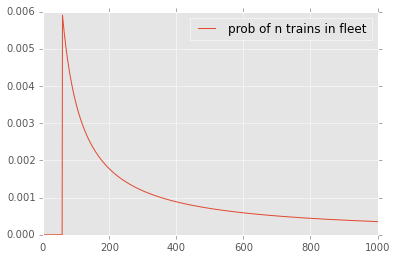

In [379]:
dftrain.plot()

The most likely value, if you had to guess, is 60. That might not seem like a very good guess; after all, what are the chances that you just happened to see the train with the highest number? Nevertheless, if you want to maximize the chance of getting the answer exactly right, you should guess 60.

But maybe that's not the right goal. An alternative is to compute the mean of the posterior distibution:

In [380]:
print suite.Mean()

333.419893264


The mean of the posterior is 333, so that might be a good guess if you wanted to minimize error. If you played this guessing game over and over, using the mean of the posterior as your estimate would minimize the mean squared error over the long run.
See http://en.wikipedia.org/wiki/Minimum_mean_square_error

### What about that prior??

To make any progress on the locomotive problem we had to make assumptions, and some of them were pretty arbitrary. In particular, we chose a uniform prior from 1 to 1000, without much justification for choosing 1000, or for choosing a uniform distribution.

It is not crazy to believe that a railroad company might operate 1000 locomotives, but a reasonable person might guess more or fewer. So we might wonder whether the posterior distribution is sensitive to these assumptions. Wtih so little data - only one observation - it probably is.

Recall that with a uniform prior from 1 to 1000, the mean of the posterior is 333.
With an upper bound of 500, we get a posterior mean of 207; and with an upper bound of 2000, the posterior mean is 552.

In [381]:
hypos = xrange(1,501)
suite = Train(hypos)
suite.Update(60)
suite.Mean()

207.079227983409

In [382]:
hypos = xrange(1,2001)
suite = Train(hypos)
suite.Update(60)
suite.Mean()

552.179017164631

So that's bad. There are two ways to proceed:

* Get more data.
* Get more background information.

With more data, posterior distributions based on different priors tend to converge. For example, suppose that in addition to train 60 we also see trains 30 and 90.
Can can update the distribution.

In [383]:
hypos = xrange(1,1001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
suite.Mean()

164.3055864227336

In [385]:
hypos = xrange(1,501)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
suite.Mean()

151.84958795903822

In [386]:
hypos = xrange(1,2001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
suite.Mean()

171.3381810915094

So the differences are smaller .

## An alternative prior

If more data are not available, another option is to improve the priors by gathering more background information. It is probably not reasonable to assume that a train-operating company with 1000 locomotives is just as likely as a company with only 1.

With some effort, we could probably find a list of companies that operate locomotives in the area of observation. Or we could interview an expert in rail shipping to gather information about the typical size of companies.

But even without getting into the specifics of railroad economics, we can make some educated guesses. In most fields, there are many small companies, fewer medium-sized companies, and only one or two very large companies. In fact, the distrubtion of company sizes tends to follow a power law.

Mathematically, a power law means that the number of companies with a given size is inversely proportional to size, or 

$
PMF(X) \propto( \frac{1}{x} )^{\alpha}
$


where PMF(x) is the probability mass function of x and $\alpha$ is a parameter that is often near 1.

We can construct a power law prior like this:

In [387]:
from thinkbayes import Suite

class Train(Suite):
    
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1./hypo

In [389]:
hypos = range(1, 1001)
suitepower = Train(hypos)
suiteuniform = Train(hypos, alpha=0)

In [390]:
suitepower.Update(60)
suiteuniform.Update(60)

0.0028222671142652746

In [392]:
dfcf = pd.DataFrame({'power law': list(suitepower.Render()[1]),
                    'uniform prior': list(suiteuniform.Render()[1])},
                   index = list(suitepower.Render()[0]))

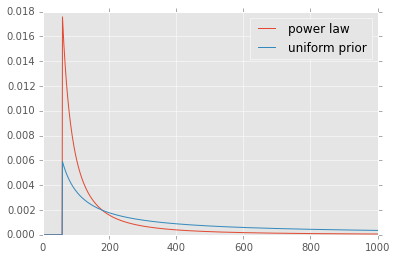

In [393]:
dfcf.plot()

In [394]:
hypos = xrange(1,501)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
suite.Mean()


130.70846986256004

In [395]:
hypos = xrange(1,1001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
suite.Mean()

133.2752313750312

In [396]:
hypos = xrange(1,2001)
suite = Train(hypos)
for data in [60, 30, 90]:
    suite.Update(data)
suite.Mean()

133.99746308073065

Now the differences are much smaller. In fact, with an arbitrarily large upper bound, the mean converges to 134.

So the power law is more realistic, because it is based on general information about the size of companies, and it behaves better in practice. 


## Credible intervals

Once you have computed a posterior distribution, it is often useful to summarize the results with a single point estimate or an interval. For point estimates it is common to use the mean, median, or the value with maximum likelihood.

For intervals we usually report two values computed so that there is a 90% chance that the unknown value falls between them (or any other probability). These values define a **credible interval**.

A simple way to compute a credible interval is to add up the probablities in the posterior distribution and record the values that correspond to probablities 5% and 95%. In other words, the 5th and 95th percentiles.

In [401]:
hypos = xrange(1,1001)
suite = Train(hypos)
for data in [60, 30, 90, 23, 45, 100, 45]:
    suite.Update(data)
suite.Mean()

116.09007063776997

In [402]:
from thinkbayes import Percentile

interval = Percentile(suite, 5), Percentile(suite, 95)

In [403]:
print interval

(100, 153)


## Cumulative distribution functions

In the previous section we computed percentiles by iterating through the values andprobabilities in a Pmf. If we need to compute more than a few percentiles, it is more efficient to use a cumulative distribution function, or Cdf.

Cdfs and Pmfs are equivalent in the sense that they contain the same information about the distribution, and you can always convert from one to the other. The advantage of the Cdf is that you can compute percentiles more efficiently.



In [404]:
cdf = suite.MakeCdf()

In [405]:
interval = cdf.Percentile(5), cdf.Percentile(95)

In [406]:
print interval

(100, 153)


Converting from a Pmf to a Cdf takes time proportional to the number of values, len(pmf). The Cdf stores the values and probabilities in sorted lists, so looking up a probability to get the corresponding value takes “log time”: that is, time proportional to the logarithm of the number of values. Looking up a value to get the corresponding probability is also logarithmic, so Cdfs are efficient for many calculations.

## 3.9 Exercises
### Exercise 1
To write a likelihood function for the locomotive problem, we had to answer the question: "If the railroad has N locomotives, what is the probability that we see number 60?"
The answer depends on what sampling process we use when we observe the locomotive. In this chapter, I resolved the ambiguity by specifying that there is only one train-operating company (or only one that we care about).
But suppose instead that there are many companies with different numbers of trains. And suppose that you are equally likely to see any train operated by any company. In that case, the liklihood function is different because you are more likely to see a train operated by a large company.

As an exercise, implement the likelihood function for this variation of the locomotive problem, and compare the results.


http://stats.stackexchange.com/questions/70096/locomotive-problem-with-various-size-companies

I'm first outlining this approach for two companies in detail, the extension to even more companies then should be intuitive (at least for the likelihood, the prior could be more tricky).

Imagine there are two companies, A and B, where A has $N_A$ locomotives and B has $N_B$ locomotives.
We assume $N_A \geq N_B$ (you can always switch A and B to make this hold). The total number for that hypothesis of locomotives is
$N_{tot} = N_A + N_B$.

Imagine you see a locomotive with the number n. There are three cases for the likelihood:

1. $N_A < n$: This can't happen, so the likelihood is zero.
2. $N_B < n \leq N_A$: This locomotive must have come from company A, so there is only one locomotive with this number. Thus the likelihood is $\frac{1}{N_{tot}}$
3. $n \leq N_B$: This locomotive can be either from A or from B, so there are two locomotives with this number. The likelihood to see one of them is $\frac{2}{N_{tot}}$.

As a quick sanity check: The likelihood to see any number at all is:

$
\sum_{i=1}^{\infty} L(i) = \sum_{i=1}^{N_B} \frac{2}{N_{tot}} + \sum_{i=N_B + 1}^{N_A} \frac{1}{N_{tot}}
$

$
= \frac{2 N_{B}}{N_{tot}} + \frac{N_{A} - N_{B}}{N_{tot}} = \frac{N_A + N_B}{N_{tot}} = 1
$


Generally, there will be (number of companies + 1) cases, one for each interval $N_{i} < n \leq N_{i+1}$.
Luckily, we can look at the problem from a different angle and see that what we need for the likelihood are actually just two numbers: $N_{tot}$, the total number of locomotives; and $N_{n}$, the number of locomotives that have the number $n$. How likely are we to see one of the $N_{n}$ locomotives, out of $N_{tot}$ locomotives? This will happen in $\frac{N_{n}}{N_{tot}}$ of all cases, so this fraction is the likelihood. In Python, you can calculate this two sum generators (and you don't even have to order the companies by size). If $N_s$ contains a list (or tuple) of company sizes according to your hypothesis, then this will give the likelihood for seeing a locomotive with number $n$.:

```
total_number_of_locomotives = sum(N for N in Ns)
number_of_locomotives_with_that_number = sum(1 for N in Ns if n<=N)
likelihood = (number_of_locomotives_with_that_number / total_number_of_locomotives)
```

Note the trivial case with one company is also handled by this code (the first sum will just be $N$, the second sum will be 0 or 1, depending on whether $n \leq N$)


In [478]:
from thinkbayes import Suite

class TrainTough(Suite):
    
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, hypo**(-alpha))
        self.Normalize()
        self.total_number_of_locomotives = sum(N for N in hypos)
    
    def Likelihood(self, data, hypo):
        number_of_locomotives_with_that_number = sum(1 for N in hypos if data <= hypo)
        return (float(number_of_locomotives_with_that_number) / self.total_number_of_locomotives)

In [492]:
hypos = xrange(1,1001)
suitetough = TrainTough(hypos)
for data in [30,60,90]:
    suitetough.Update(data)
suitetough.Mean()

377.38016140660835

In [480]:
sum(1 for N in hypos if 20 <= N)

1

In [493]:
hypos = xrange(1,1001)
suite = Train(hypos)
for data in [30,60,90]:
    suite.Update(data)
suite.Mean()

133.2752313750312

In [494]:
dftough = pd.DataFrame({'many companies': list(suitetough.Render()[1]),
                       'one company': list(suite.Render()[1])}, index=list(suitetough.Render()[0]))

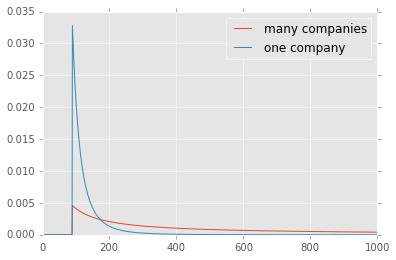

In [497]:
dftough.plot()

## Chapter 4 More Estimation

### 4.1 The Euro problem

When spun on edge 250 times, a Belgian one-euro coin came up heads 140 times and tails 110. It looks very suspicious to me said Barry Blight, a statistics lecturer at the London School of Economics. If the coin were unbiased, the change of getting a results as extreme as that would be less than 7%.

But do these data give evidence that the coin is biased rather than fair?

To answer that question, we'll proceed in two steps. The first is to estimate the probability that the coin lands face up.
The second is to evaluate whether the data support the hyopthesis that the coin is biased.

Any given coin has some probability, x, of landing heads up when spun on edge. It seems reasonable to believe that the value of x depends on some physical characteristics of the coin, primarily the distribution of weight.

If a coin is perfectly balanced, we expect x to be close to 50%, but for a lopsided coin, x might be substantially different. We can use Baye's theorem and the observed data to estimate x.

Let's define 101 hypotheses, where $H_x$ is the hypothesis that the probablity of heads is x%, for values from 0 to 100. I'll start with a uniform prior where the probablity of $H_x$ is the same for all x. We'll come back later to consider other priors.

The likelihood function is relatively easy: if $H_x$ is true, the probablity of heads is $\frac{x}{100}$ and the probability of tails is $1 - \frac{x}{100}$.



In [498]:
class Euro(Suite):

    def Likelihood(self, data, hypo):
        x = hypo
        if data == 'H':
            return x/100.0
        else:
            return 1 - x/100.0

In [499]:
suite = Euro(xrange(0, 101))
dataset = 'H'*140 + 'T'*110

In [500]:
for data in dataset:
    suite.Update(data)

In [501]:
dfeuro = pd.DataFrame({'uniform': list(suite.Render()[1])}, index=list(suite.Render()[0]))

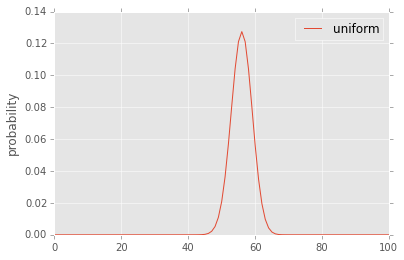

In [503]:
dfeuro.plot()
plt.ylabel('probability')

### Summarizing the posterior

Again, there are several ways to summarize the posterior distribution. One option is to find the most likely value in the posterior distribution.

In [504]:
suite.MaximumLikelihood()

56

In [505]:
140./250

0.56

```In this case the result is 56, which is also the observed percentage of heads, 140/250 = 56%. So that suggests (correctly) that the observed percentage is the maximum likelihood estimator for the population.
```

We might also summarize the posterior by computing the mean and median:


In [506]:
print 'Mean', suite.Mean()

Mean 55.9523809524


In [508]:
import thinkbayes
print 'Median', thinkbayes.Percentile(suite, 50)

 Median 56


In [509]:
print 'CI', thinkbayes.CredibleInterval(suite, 90)

CI (51, 61)


Now, getting back to the original question, we would like to know whether the coin is fair. We observe that the posterior credible interval does not include 50%, which suggests that the coin is not fair.

But that is not exactly the question we started with. MacKay asked, “ Do these data give evidence that the coin is biased rather than fair?” To answer that question, we will have to be more precise about what it means to say that data constitute evidence for a hypothesis. And that is the subject of the next chapter.



### Swamping the priors

We started with a uniform prior, but that might not be a good choice. I can believe that if a coin is lopsided, x might deviate substantially from 50%, but it seems unlikely that the Belgian Euro coin is so imbalanced that x is 10% or 90%.
It might be more reasonable to choose a prior that gives higher probability to values of x near 50% and lower probability to extreme values.

In [518]:
def TrianglePrior():
    suite = Euro()
    for x in range(0, 51):
        suite.Set(x, x)
    for x in range(51, 101):
        suite.Set(x, 100-x) 
    suite.Normalize()
    
    return suite

In [519]:
suite = TrianglePrior()

In [520]:
for data in dataset:
    suite.Update(data)

In [521]:
suiteuni = Euro(xrange(0,101))

In [522]:
for data in dataset:
    suiteuni.Update(data)

In [523]:
dfeurotrash = pd.DataFrame({'triangle': list(suite.Render()[1]),
                           'uniform': list(suiteuni.Render()[1])},
                          index=list(suite.Render()[0]))

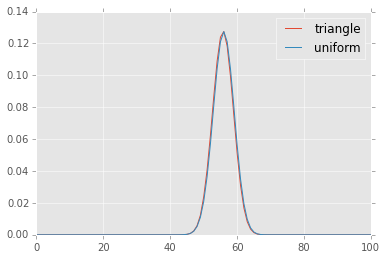

In [524]:
dfeurotrash.plot()

Even with substantially different priors, the posterior distributions are very similar.

In [525]:
suite.Mean()

55.74349943859506

In [526]:
suiteuni.Mean()

55.952380952380956

In [529]:
thinkbayes.Percentile(suite, 50)

56

In [530]:
thinkbayes.Percentile(suiteuni, 50)

56

In [531]:
thinkbayes.CredibleInterval(suite, 90)

(51, 61)

In [532]:
thinkbayes.CredibleInterval(suiteuni, 90)

(51, 61)